In [48]:
import ROOT
# Colors
from ROOT import kYellow, kBlue, kRed

In [49]:
def genHist(filename, ttree, var):
    # To do: Check if var is vector or not
    # Open file .root
    file = ROOT.TFile.Open(filename)
    # Select tree. Usually we'll use "Nominal"
    tree = file.Get(ttree)
    # Create empty histogram hist
    hist = ROOT.TH1F("h",var,100,0,160)
    # For each row in the tree, 
    for entry in tree:
        # we'll select the value in the var column
        event = getattr(entry,var)
        # and fill the histogram with it
        hist.Fill(event)
    # Set the histogram memory direction
    hist.SetDirectory(0)        
    ROOT.TH1F.AddDirectory(False)
    return hist

files = ["ZtautauB_221.root", "ZtautauC_221.root", "ZtautauL_221.root"]
# Stacked histogram object
hs = ROOT.THStack("hs"," stacked histograms")
# colors must be the same size as files list.
colors = [kYellow, kBlue, kRed]

# Get stacked histogram of "Tau1Pt" var for each file. 
for i in range(len(files)):
    hist = genHist(files[i], "Nominal", "Tau1Pt")
    hist.SetFillColor(colors[i])
    hs.Add(hist)
    

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


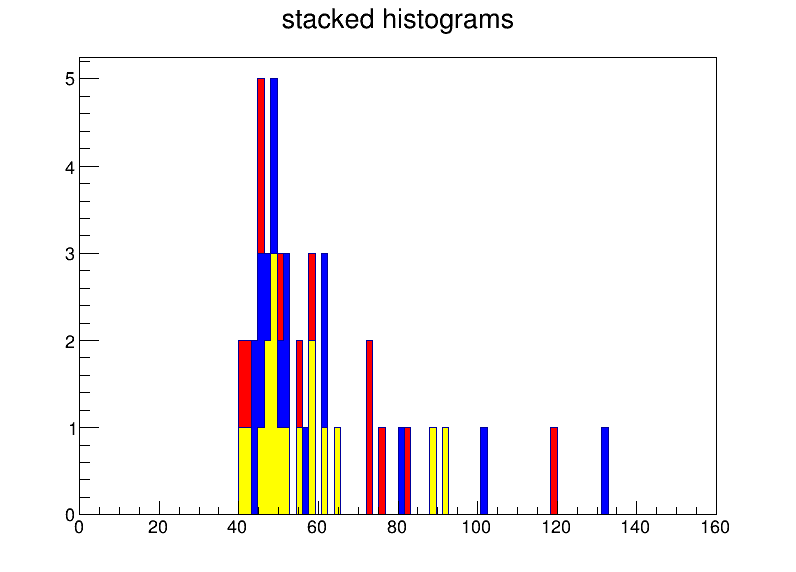

In [50]:
# Plot histogram
c = ROOT.TCanvas("Canvas","Tau1Pt",800,600)
hs.Draw()
c.Draw()